In [9]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('covid19_tweets.csv')

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82710 entries, 0 to 82709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         82710 non-null  object
 1   user_location     65995 non-null  object
 2   user_description  78005 non-null  object
 3   user_created      82710 non-null  object
 4   user_followers    82710 non-null  int64 
 5   user_friends      82710 non-null  int64 
 6   user_favourites   82710 non-null  int64 
 7   user_verified     82710 non-null  bool  
 8   date              82710 non-null  object
 9   text              82710 non-null  object
 10  hashtags          58903 non-null  object
 11  source            82693 non-null  object
 12  is_retweet        82710 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 7.1+ MB


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45892 entries, 2 to 82709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         45892 non-null  object
 1   user_location     45892 non-null  object
 2   user_description  45892 non-null  object
 3   user_created      45892 non-null  object
 4   user_followers    45892 non-null  int64 
 5   user_friends      45892 non-null  int64 
 6   user_favourites   45892 non-null  int64 
 7   user_verified     45892 non-null  bool  
 8   date              45892 non-null  object
 9   text              45892 non-null  object
 10  hashtags          45892 non-null  object
 11  source            45892 non-null  object
 12  is_retweet        45892 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 4.3+ MB


In [25]:
df.describe()

,user_followers,user_friends,user_favourites
count,8.271000e+04,82710.000000,8.271000e+04
mean,1.038851e+05,2172.423226,1.506148e+04
std,8.112205e+05,9692.216847,4.615382e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.700000e+02,158.000000,2.230000e+02
50%,9.860000e+02,565.000000,1.896000e+03
75%,5.257000e+03,1784.000000,9.947750e+03
max,1.389284e+07,497363.000000,2.047197e+06


In [7]:
df['user_location'].unique()

array(['Pewee Valley, KY', 'Stuck in the Middle ', 'Jammu and Kashmir',
       ..., 'Ocean City, MD', 'Odogwu villa ', 'Miami, Florida, USA'],
      dtype=object)

In [54]:
df = df.dropna()

In [8]:
group_location = df.groupby('user_location')
group_location.first()

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
user_location,,,,,,,,,,,,
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤,Blqi,"At the end of the day, is night 🌝. 偽の愛 🇹🇹",2018-08-20 20:02:57,50,41,132,False,2020-07-31 18:49:41,Follow me for a follow back #follow #follow4f...,"['follow', 'follow4follow', 'gainfollowers', '...",Twitter for Android,False
,Wild Goose #TNCM,Veteran market strategist. Cantillon not Law! ...,2014-12-03 18:15:49,1893,1657,2711,False,2020-07-25 07:47:22,Further evidence of X-immunity to #COVID19 con...,"['COVID19', 'coronavirus']",Twitter for iPad,False
"Cathlamet, Wa.",Dennis Emery,Became a HUSKY @ 10--Bleeding PURPLE for 59 yr...,2009-02-21 02:30:12,665,591,8043,False,2020-07-27 06:11:17,Just saw pics on @KING5Seattle Plenty of Moron...,['COVID19'],Twitter for Android,False
Canada 🇨🇦🍁🛶🌲,Sarah🍁🐦,"A friend from Canada, here to inspire the inte...",2010-02-03 14:44:06,950,2819,28291,False,2020-07-28 04:50:18,With love. 💖\n#ThinkForYourself 💡\n#COVID19 😷\...,"['ThinkForYourself', 'COVID19', 'MasksDontSave...",Twitter for Android,False
WorldWide,The Beauty Influencer,"Business Woman, Entrepreneur, & Beauty Expert ...",2014-04-27 07:24:02,18977,1298,25240,False,2020-07-26 05:45:34,Quote of the week. #ThinkBIGSundayWithMarsha #...,"['ThinkBIGSundayWithMarsha', 'SundayMotivation...",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...
🛰️ Gauteng,Mr Junior Vorsi,I'm that guy 😎,2019-01-30 11:21:46,414,729,3847,False,2020-07-25 00:01:01,You worried about living to see the end of the...,"['COVID19', 'Jerusalema', 'Covid_19']",Twitter for Android,False
🤔,PDP 2023!! 🇮🇹🇮🇹🇮🇹,This is the @OfficialPDPNig Number 1 Support H...,2017-07-27 17:07:53,37524,2068,146050,False,2020-07-25 09:43:20,#ObasekiFlagOff #EdoIsPDP- In line with the @i...,"['ObasekiFlagOff', 'EdoIsPDP', 'Covid19']",Twitter for iPhone,False
🤡 🌎,Justin ⚜️,🙋🏻‍♂️ Roman Catholic • Avid LSU fan ⚾️ Seek tr...,2013-06-06 03:17:11,623,437,38725,False,2020-07-31 19:15:24,It’s time to open everything back up. #COVID19...,['COVID19'],Twitter for iPhone,False


<Figure size 432x288 with 0 Axes>

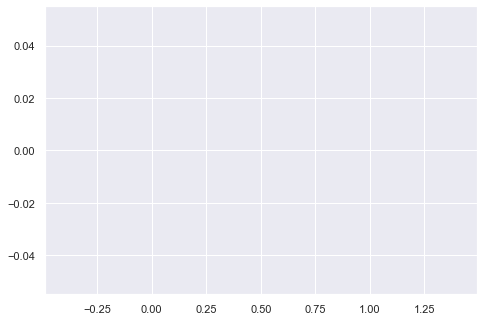

In [14]:
plt.figure(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['user_verified'],df['is_retweet'])
plt.show()
#fig.savefig('Research Interest Across Years.png', dpi=300)